# Task - 4 SALES PREDICTION 

### Probleme Statement

- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
- It is a regression problem

### # import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

### # import dataset

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### # EDA

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


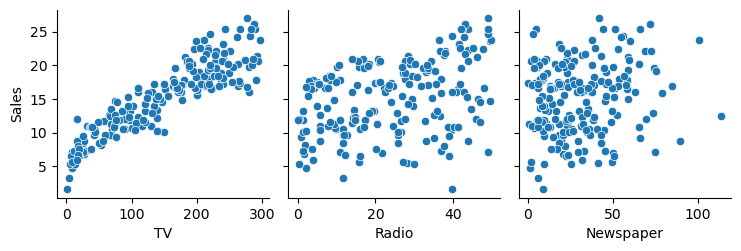

In [6]:
# visualization

sns.pairplot(df , x_vars = ['TV' , 'Radio' , 'Newspaper'] , y_vars = 'Sales' )

- Insights = When ad cost increase on TV sales also increase

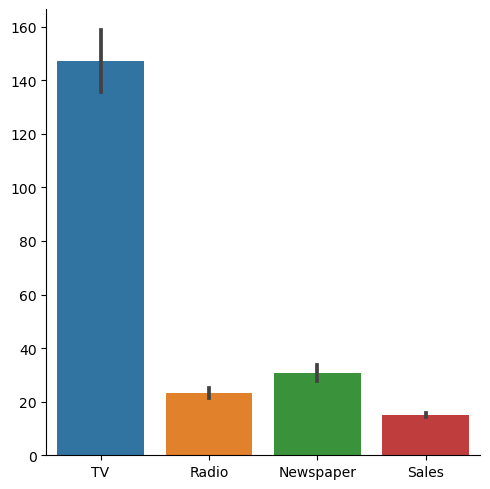

In [7]:
sns.catplot(data=df , kind='bar')

<Axes: >

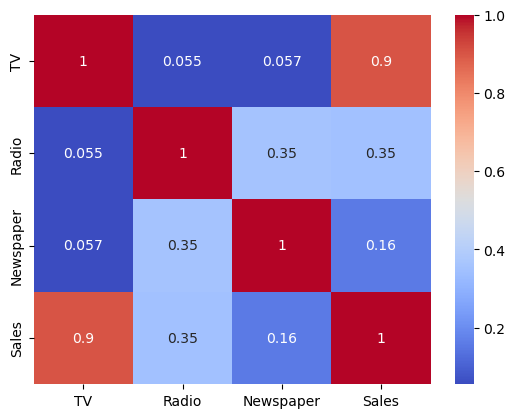

In [8]:
# correlation

sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')

- TV is highly coorelated with sales

### Data preprocessing

In [9]:
df.isna().sum()  # there is no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Extracting Features and Targets

In [10]:
# tv is highlycorrelated with sales 

x = df['TV']     # featues
y = df['Sales']  # target

In [11]:
x = x.values.reshape(-1,1)

### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)

## Split data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x_scal , y , train_size = 0.7 , random_state = 5)

## Model training using Linear regression algorithm

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [17]:
print('intercept' , lr.intercept_)
print('slope' , lr.coef_)

intercept 15.154099453707651
slope [4.8389299]


## Stastical data

In [18]:
# add constant
x_train_sm = sm.add_constant(x_train)

# traing model using ols method
model = sm.OLS(y_train , x_train_sm).fit()

# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.21e-51
Time:                        19:10:38   Log-Likelihood:                -320.39
No. Observations:                 140   AIC:                             644.8
Df Residuals:                     138   BIC:                             650.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1541      0.203     74.548      0.000      14.752      15.556
x1             4.8389      0.202     23.954      0.000       4.439       5.238
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.723
Skew:                          -0.172   Prob(JB):                        0.697
Kurtosis:                       2.921   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
r2 = lr.score(x_train , y_train)
r2

0.806120289338039

## Evaluate model

In [20]:
y_pred = lr.predict(x_test)   # predicted value
y_pred

array([ 7.94183965, 13.65435285,  8.99280647,  9.37138054, 17.45704462,
       13.68260465, 19.50247467, 10.09462652, 20.90376377, 13.04976441,
       23.00569741, 12.25306376, 20.25962281, 18.28764743, 18.0842345 ,
       20.30482569, 15.40596422, 19.72848904, 11.16254442,  8.93065252,
       15.69413254, 14.92003332, 21.6891637 , 20.09576239, 17.16322594,
       21.02242131, 19.41206893, 22.74578088,  7.25814618, 18.90918695,
       21.70046442, 12.15135729, 23.43512471, 17.79041582, 18.13508773,
       12.51863064,  9.00410719, 14.71097003, 19.3047121 , 10.36584377,
       14.28719309, 20.36697964,  7.85708426, 16.739449  , 19.74544012,
        9.36007982, 17.49094678, 19.68328617, 16.59253966,  7.28639798,
       13.80126219, 11.95359472, 18.53626324, 18.01077983, 11.26425089,
       11.9140422 ,  7.95314037, 22.67797657, 21.61005867, 11.08908975])

In [21]:
lr.score(x_test , y_test)

0.826319894352471

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)   # testing accuracy

0.826319894352471

C:\Users\DELL\AppData\Local\Temp\ipykernel_19296\1257717381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred) )  # nd means good


<Axes: xlabel='Sales', ylabel='Density'>

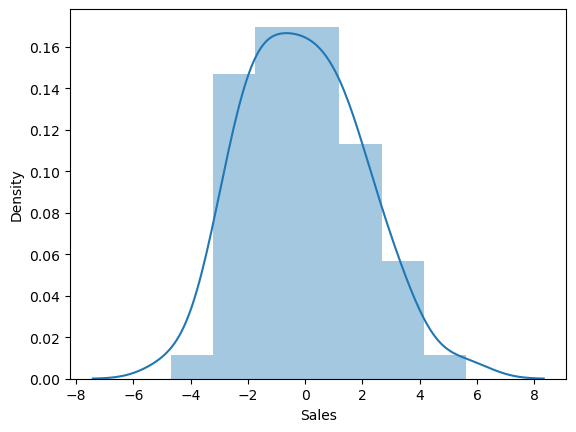

In [23]:
sns.distplot((y_test - y_pred) )  # nd means good

Text(0, 0.5, 'predicted value y predicted')

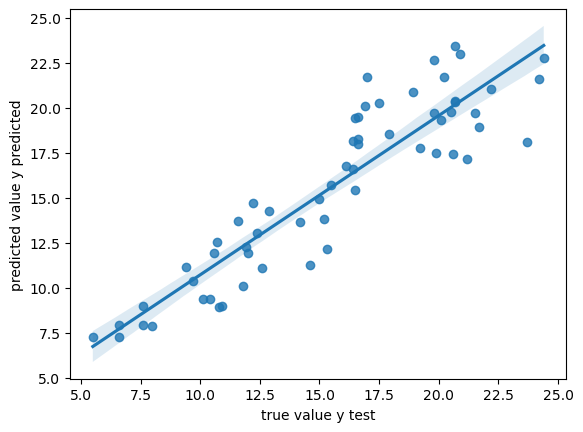

In [24]:
sns.regplot(x = y_test , y = y_pred)
plt.xlabel('true value y test')
plt.ylabel('predicted value y predicted')